# Using Pandas to Clean and Analyze Employee Exit Surveys

In this project, we utlize pandas to clean and organize employee exit survey data from the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education) (TAFE) institute in Queensland, Australia. <br>Our goal is to analyze whether there is a relationship between the employee dissatisfaction and resignation. Particularly, our stakeholders want to the following questions answered - <br>

<li>
    Are employees who worked for a short time resigning due to some kind of dissatisfaction? What about employees who have worked there longer?
</li>
<li>
    Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
</li>

The employee exit surveys for DETE and TAFE can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey), and [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

The datasets for the two surveys have been slightly modified (changed the encoding from <mark>cp1252</mark> to <mark>UTF-8</mark>) and provided by [Dataquest](https://www.dataquest.io/) as <mark>dete_survey.csv</mark> and <mark>tafe_survey.csv</mark>.

<b>Project tags</b>: python, pandas, numpy, matplotlib, seaborn, data cleaning, data organization, survey data

## Import Data

Lets start by reading and exploring the datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = 80
pd.options.display.max_rows = 700
%matplotlib inline

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
print(dete_survey.shape)
print(dete_survey.info())
display(dete_survey.head())

(822, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical wo

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
print(tafe_survey.shape)
print(tafe_survey.info())
display(tafe_survey.head())

(702, 72)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
#Lets look at the unique values in all columns except ID/Unique ID
for col in dete_survey.columns[1:]:
    print(dete_survey[col].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
04/2014         2
08/2012         2
07/2014         2
02/2014         2
09/2010         1
07/2012         1
07/2006         1
2010            1
09/2014         1
2014            1
11/2012         1
Name: Cease Date, dtype: int64
Not Stated    73
2011          40
2007          34
2008          31
2012          27
201

In [6]:
for col in tafe_survey.columns[1:]:
    print(tafe_survey[col].value_counts())

Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
Metropolitan South Institute of TAFE       1
The Bremer Institute of TAFE               1
Name: Institute, dtype: int64
Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64
2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATION YEAR, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dty

The following observations were made from the initial analysis - 
<list>
<li>
    The dete_survey dataframe contains columns of object and boolean datatype. It has 822 entries and 56 columns. Majority of object type columns are categorical columns with a set number of values (A, SA, N, D, SD, M) the meaning of which is not available anywhere.
    </li> <br>
<li>
    The tafe_survey dataframe has 702 entries with 72 columns. Majority of the columns are also of the object datatype. 
    </li><br>
<li>
    Looking at the values in some of the tafe_survey columns we can assume that the alphabets in the dete_survey df most probably correspond to - Agree(A), Strongly Agree(SA), Neutral(N), Disagree(D), Strongly Disagree(SD) and Missing(M).
    </li><br>
<li>
    A lot of the columns in both the dataframes are asking very similar questions (even though they are framed differently).
    </li><br>
<li>
    Some columns in the dete_survey df has NaN values masked as <mark>"Not Stated"</mark>. So we will read the dete_survey df again but this time set <mark>na_values</mark> parameter to <mark>Not Stated</mark>.
    </li>
</list>

In [7]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
for cols in dete_survey.columns[1:]:
    print(dete_survey[cols].value_counts(dropna = False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
NaN         34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
07/2014      2
02/2014      2
04/2013      2
04/2014      2
08/2012      2
07/2012      1
2010         1
11/2012      1
2014         1
09/2010      1
07/2006      1
09/2014      1
Name: Cease Date, dtype: int64
NaN       73
2011.0    40
2007.0    34
2008.0    31
2010.0    27
2012.0    27
2009.0    24
2006.0    23
1970.0    21
1975.0    21
2013.0    21
2005.0    20
1990.0 

In [13]:
for i, val in enumerate(dete_survey.columns):
    print(i, '\t', val)

0 	 ID
1 	 SeparationType
2 	 Cease Date
3 	 DETE Start Date
4 	 Role Start Date
5 	 Position
6 	 Classification
7 	 Region
8 	 Business Unit
9 	 Employment Status
10 	 Career move to public sector
11 	 Career move to private sector
12 	 Interpersonal conflicts
13 	 Job dissatisfaction
14 	 Dissatisfaction with the department
15 	 Physical work environment
16 	 Lack of recognition
17 	 Lack of job security
18 	 Work location
19 	 Employment conditions
20 	 Maternity/family
21 	 Relocation
22 	 Study/Travel
23 	 Ill Health
24 	 Traumatic incident
25 	 Work life balance
26 	 Workload
27 	 None of the above
28 	 Professional Development
29 	 Opportunities for promotion
30 	 Staff morale
31 	 Workplace issue
32 	 Physical environment
33 	 Worklife balance
34 	 Stress and pressure support
35 	 Performance of supervisor
36 	 Peer support
37 	 Initiative
38 	 Skills
39 	 Coach
40 	 Career Aspirations
41 	 Feedback
42 	 Further PD
43 	 Communication
44 	 My say
45 	 Information
46 	 Kept infor

In [14]:
for i, val in enumerate(tafe_survey.columns):
    print(i, '\t', val)

0 	 Record ID
1 	 Institute
2 	 WorkArea
3 	 CESSATION YEAR
4 	 Reason for ceasing employment
5 	 Contributing Factors. Career Move - Public Sector 
6 	 Contributing Factors. Career Move - Private Sector 
7 	 Contributing Factors. Career Move - Self-employment
8 	 Contributing Factors. Ill Health
9 	 Contributing Factors. Maternity/Family
10 	 Contributing Factors. Dissatisfaction
11 	 Contributing Factors. Job Dissatisfaction
12 	 Contributing Factors. Interpersonal Conflict
13 	 Contributing Factors. Study
14 	 Contributing Factors. Travel
15 	 Contributing Factors. Other
16 	 Contributing Factors. NONE
17 	 Main Factor. Which of these was the main factor for leaving?
18 	 InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction
19 	 InstituteViews. Topic:2. I was given access to skills training to help me do my job better
20 	 InstituteViews. Topic:3. I was given adequate opportunities for personal development
21 	 InstituteViews. Topic:4. I was given a

## Drop Unnecessary Columns

To answer the stakeholders questions we will need the following information from the data - age of the employees, period of employment as well as columns related to dissatisfaction. Lets clean up the datasets first by removing the columns that are not necessary for initial analysis.

In [20]:
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[18:66])
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurren

In [21]:
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49])
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

## Clean Column Names

As mentioned before, a lot of the columns in both the dataframes are answering the same questions but the column names are different. We will standardize the column names to make the merging of the two dataframes easier.<br>We will start by converting all column names in <mark>dete_survey_updated</mark> to lowercase and replacing spaces with underscores (e.g., <b>cease_date</b> instead of <b>Cease Date</b>)

In [22]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

We will rename some of the columns in tafe_survey_updated to match the columns above and shorten the name of some of the others.

In [27]:
tafe_survey_updated.rename(columns = {
                                             'Record ID': 'id',
                                             'CESSATION YEAR': 'cease_date',
                                             'Reason for ceasing employment': 'separationtype',
                                             'Gender. What is your Gender?': 'gender',
                                             'CurrentAge. Current Age': 'age',
                                             'Employment Type. Employment Type': 'employment_status',
                                             'Classification. Classification': 'position',
                                             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                                        }, 
                           inplace=True)

In [28]:
#quick check to see if the rename function worked
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'gender', 'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [29]:
display(tafe_survey_updated.head(1))
dete_survey_updated.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes


## Filter Data

In [30]:
print(dete_survey_updated['separationtype'].unique())
print(tafe_survey_updated['separationtype'].unique())
print(tafe_survey_updated['separationtype'].value_counts(dropna=False))

['Ill Health Retirement' 'Voluntary Early Retirement (VER)'
 'Resignation-Other reasons' 'Age Retirement' 'Resignation-Other employer'
 'Resignation-Move overseas/interstate' 'Other' 'Contract Expired'
 'Termination']
['Contract Expired' 'Retirement' 'Resignation' 'Retrenchment/ Redundancy'
 'Termination' 'Transfer' nan]
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64


A closer look at the unique values in <mark>'separationtype'</mark> column show different reasons other than 'resignation'. Since we are only interested in employees who resigned we can remove rows that do not come under this criterion. <br>The <mark>dete_survey_updated</mark> df contains multiple separation types with the string 'Resignation'.<br> <mark>tafe_survey_updated</mark> contains only one type of 'Resignation' value and one <b>NaN</b> values that we will set to <b>False</b> (i.e., we will assume that they are not resignation data)

In [31]:
dete_resignation_mask = dete_survey_updated['separationtype'].str.contains('[Rr]esignation')
dete_resignations = dete_survey_updated[dete_resignation_mask]
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [32]:
tafe_resignation_mask = tafe_survey_updated['separationtype'].str.contains('[Rr]esignation', na=False)
tafe_resignations = tafe_survey_updated[tafe_resignation_mask]
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Career Move - Private Sector,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,NaN,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Verifying Data

Before we start cleaning and analyzing data, we are going to run some tests to make sure the data is not corrupted in any way. The easiest way to do it would be to check if the <br> 
<list>
<ul>cease_date is after the dete_start_date</ul>
<ul>cease_date is before the current date/year</ul>
<ul>dete_start_dates are not very old.</ul>
</list>
<br>
First, lets clean up <mark>cease_date</mark> column in <mark>dete_resignations</mark> by extracting the year from the data.

In [33]:
print(dete_resignations['cease_date'].unique())
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)
dete_resignations['cease_date'].unique()

['05/2012' '07/2012' '2012' '2013' '2010' '07/2013' '06/2013' '09/2013'
 '09/2010' '01/2014' '05/2013' '08/2013' '10/2013' '12/2013' '11/2013' nan
 '07/2006']


/Users/neha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([ 2012.,  2013.,  2010.,  2014.,    nan,  2006.])

In [35]:
dete_resignations['dete_start_date'].sort_values(ascending=True)

416    1963.0
658    1971.0
503    1972.0
23     1973.0
41     1974.0
492    1974.0
726    1975.0
116    1976.0
43     1976.0
40     1977.0
295    1980.0
348    1980.0
727    1980.0
126    1980.0
21     1980.0
20     1982.0
789    1983.0
621    1983.0
724    1984.0
589    1985.0
685    1985.0
389    1985.0
652    1986.0
212    1986.0
90     1986.0
770    1987.0
701    1988.0
494    1988.0
345    1988.0
682    1988.0
505    1989.0
610    1989.0
317    1989.0
195    1989.0
470    1990.0
377    1990.0
788    1990.0
481    1990.0
563    1990.0
273    1991.0
452    1991.0
406    1991.0
744    1991.0
439    1992.0
647    1992.0
279    1992.0
374    1992.0
731    1992.0
355    1992.0
398    1993.0
486    1993.0
433    1993.0
51     1993.0
612    1993.0
383    1994.0
577    1994.0
228    1994.0
5      1994.0
135    1994.0
786    1994.0
25     1995.0
192    1995.0
798    1995.0
649    1995.0
541    1996.0
604    1996.0
617    1996.0
300    1996.0
650    1996.0
223    1996.0
22     1997.0
9     

In [36]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Text(0.5, 0, 'tafe_cease_date')

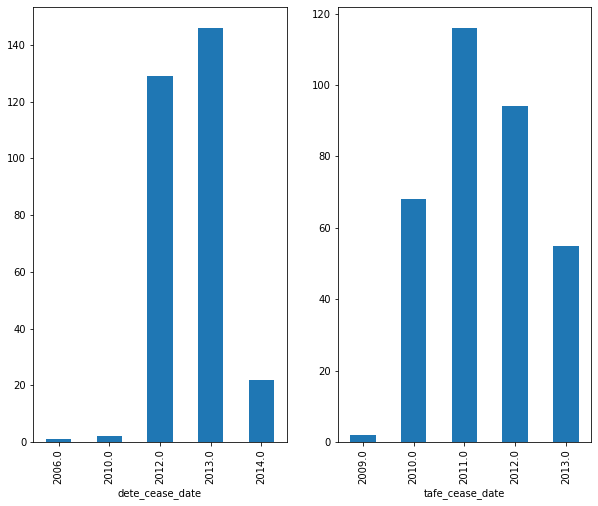

In [37]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(10,8))
dete_resignations['cease_date'].value_counts().sort_index().plot(kind='bar', ax=ax1)
tafe_resignations['cease_date'].value_counts().sort_index().plot(kind='bar', ax=ax2)
ax1.set_xlabel('dete_cease_date')
ax2.set_xlabel('tafe_cease_date')

In [38]:
#check if cease_date is greater than start_date
(dete_resignations['cease_date'] - dete_resignations['dete_start_date']).unique()

array([  7.,  18.,   3.,  15.,  14.,   5.,  nan,  30.,  32.,  39.,  17.,
         9.,   6.,   1.,  35.,  38.,  36.,  19.,   4.,  26.,  10.,   8.,
         2.,   0.,  23.,  13.,  16.,  12.,  21.,  20.,  24.,  33.,  22.,
        28.,  49.,  11.,  41.,  27.,  42.,  25.,  29.,  34.,  31.])

The bar charts for <mark>cease_date</mark> show that the resignation years don't match up all the way in the two dataframes. For e.g., there are some 2006 cases in <mark>dete_resignations</mark> df but not in <mark>tafe_resignations</mark> df. Also, there are plenty of 2010 & 2011 cases in <mark>tafe_resignations</mark> compared to <mark>dete_resignations</mark>. However, our end goal does not care about the dates of resignation - only the reasons. So we will leave the data as is.<br>
The above analysis also show that there is no corrupted data. The minimum dete_start_date is <b>1963</b> and the maximum cease_date in both dataframes do not exceed <b>2014</b>. Also, the cease_date follows the start_date.

In [39]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


## Create New Column

One of our end goals is to figure out if employees who have worked for a short or long period of time are resigning due to some dissatisfaction. To do that, we first check if we have information for the number of years an employee has worked. <br>
We will introduce a new column in dete_resignations df that represents the number of years an employee spent in the workplace. It can be calculated by subtracting <mark>dete_start_date</mark> from <mark>cease_date</mark>. A similar column (<mark>institute_service</mark>) already exists in tafe_resignations df.

In [40]:
dete_resignations.loc[:,'institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head()

/Users/neha/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/neha/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [41]:
print(tafe_resignations['institute_service'].unique())
print(dete_resignations['institute_service'].unique())

[nan '3-4' '7-10' '1-2' 'Less than 1 year' '11-20' '5-6'
 'More than 20 years']
[  7.  18.   3.  15.  14.   5.  nan  30.  32.  39.  17.   9.   6.   1.  35.
  38.  36.  19.   4.  26.  10.   8.   2.   0.  23.  13.  16.  12.  21.  20.
  24.  33.  22.  28.  49.  11.  41.  27.  42.  25.  29.  34.  31.]


In [43]:
dete_resignations.columns
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'gender', 'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Identify Dissatisfied Employees

After calculating the number of years, we need to figure out which employees noted dissatisfaction as a reason for their resignation. We will use the columns below to categorize employees as 'dissatisfied' - 
<ol>
<p>tafe_resignations df - 
<li>Contributing Factors. Dissatisfaction</li>
<li>Contributing Factors. Job Dissatisfaction</li>
<li>Contributing Factors. Interpersonal Conflict</li>
<br>
<p>dete_resignations df - 
<li>interpersonal_conflicts</li>
<li>job_dissatisfaction</li>
<li>dissatisfaction_with_the_department</li>
<li>physical_work_environment</li>
<li>lack_of_recognition</li>
<li>lack_of_job_security</li>
<li>work_location</li>
<li>employment_conditions</li>
<li>work_life_balance</li>
<li>workload</li>
</ol><br>
If the employee indicated any of the above factors as True, we'll mark them as dissatisfied in a new column. <br>

In [44]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].unique())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique())
print(tafe_resignations['Contributing Factors. Interpersonal Conflict'].unique())

['-' 'Contributing Factors. Dissatisfaction ' nan]
['-' 'Job Dissatisfaction' nan]
['-' nan 'Interpersonal Conflict']


In [45]:
dete_resignations['job_dissatisfaction'].unique()

array([False,  True], dtype=bool)

We will update the values in <mark>'Contributing Factors. Dissatisfaction'</mark>, <mark>'Contributing Factors. Job Dissatisfaction'</mark> and <mark>'Contributing Factors. Interpersonal Conflict'</mark> in the <mark>tafe_resignations</mark> df so that each contains only boolean values (<b>True</b> or <b>False</b>) or <b>NaN</b> values.

In [46]:
def update_vals(value):
    if value == '-':
        return False
    elif pd.isnull(value):
        return np.nan
    else:
        return True
    
cols = ['Contributing Factors. Dissatisfaction', 
        'Contributing Factors. Job Dissatisfaction', 
        'Contributing Factors. Interpersonal Conflict']
#create a copy of the dataframe to avoid the SettingWithCopy Warning before applying the map function
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up[cols] = tafe_resignations_up[cols].applymap(update_vals)

In [47]:
#quick check to see if the function worked
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,False,False,False,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,False,False,False,-,-,-,-,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,False,-,-,Other,-,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,False,False,False,-,-,Other,-,Career Move - Private Sector,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,False,-,-,Other,-,NaN,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [48]:
#create a new column called dissatisfied
tafe_resignations_up['dissatisfied'] = tafe_resignations_up[cols].any(axis=1, skipna=False)
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    235
True      97
NaN        8
Name: dissatisfied, dtype: int64

In [49]:
#create a new column for dete_resignation df as well
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'] = dete_resignations_up[['interpersonal_conflicts', 
                                                             'job_dissatisfaction', 
                                                             'dissatisfaction_with_the_department',
                                                             'physical_work_environment',
                                                             'lack_of_recognition',
                                                             'lack_of_job_security',
                                                             'work_location',
                                                             'employment_conditions',
                                                             'work_life_balance',
                                                             'workload'
                                                            ]].any(axis=1, skipna=False)

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    157
True     154
Name: dissatisfied, dtype: int64

## Combine the Data

After adding the service years and the job dissatisfaction columns, we are now ready to combine the datasets. Before doing that, lets add another column called <mark>'institute'</mark> to each dataframe indicating whether the data is from <mark>'DETE'</mark> or <mark>'TAFE'</mark>. This will allow us to distinguish between the two datasets.

In [50]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [52]:
#combine dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

print(combined.shape)
#check for missing values
combined.notnull().sum().sort_values()

(651, 54)


/Users/neha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


torres_strait                                                     0
south_sea                                                         3
aboriginal                                                        7
disability                                                        8
nesb                                                              9
business_unit                                                    32
Main Factor. Which of these was the main factor for leaving?     96
classification                                                  161
region                                                          265
role_start_date                                                 271
dete_start_date                                                 283
role_service                                                    290
interpersonal_conflicts                                         311
job_dissatisfaction                                             311
lack_of_job_security                            

The combined dataframe contains 651 entries and 56 columns
There are many columns in the combined dataframe that contain over 70% null values. Almost all of the columns are not required for this particular analysis. So we are going to drop them to make the df cleaner. Other columns like Contributing Factors and other condition columns can also be dropped as we have assembled the information we need from them into new columns(e.g., dissatisfied & institute_years)

In [53]:
#drop columns with less than 500 non-null values
combined_updated = combined.dropna(axis='columns', thresh=300).copy()
combined_updated.isnull().sum().sort_values()

institute                                                0
separationtype                                           0
id                                                       0
dissatisfied                                             8
cease_date                                              16
position                                                53
employment_status                                       54
age                                                     55
gender                                                  59
institute_service                                       88
WorkArea                                               311
Institute                                              311
Contributing Factors. Study                            319
Contributing Factors. Other                            319
Contributing Factors. NONE                             319
Contributing Factors. Maternity/Family                 319
Contributing Factors. Job Dissatisfaction              3

In [54]:
combined_updated.tail(10)

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,Contributing Factors. Study,Contributing Factors. Travel,Institute,WorkArea,age,career_move_to_private_sector,career_move_to_public_sector,cease_date,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,none_of_the_above,physical_work_environment,position,relocation,separationtype,study/travel,traumatic_incident,work_life_balance,work_location,workload
641,-,-,-,False,Ill Health,False,True,-,-,-,-,-,Central Queensland Institute of TAFE,Delivery (teaching),41 45,NaN,NaN,2013.0,NaN,True,NaN,Permanent Full-time,Male,6.350480e+17,NaN,TAFE,Less than 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teacher (including LVT),NaN,Resignation,NaN,NaN,NaN,NaN,NaN
642,-,-,-,False,Ill Health,False,False,-,-,-,-,-,Southern Queensland Institute of TAFE,Non-Delivery (corporate),NaN,NaN,NaN,2013.0,NaN,False,NaN,NaN,NaN,6.350496e+17,NaN,TAFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN
643,-,-,-,False,Ill Health,False,False,-,-,-,-,-,Southern Queensland Institute of TAFE,Non-Delivery (corporate),56 or older,NaN,NaN,2013.0,NaN,False,NaN,Permanent Part-time,Female,6.350496e+17,NaN,TAFE,3-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operational (OO),NaN,Resignation,NaN,NaN,NaN,NaN,NaN
644,Career Move - Private Sector,-,-,False,-,False,False,-,-,-,-,-,Tropical North Institute of TAFE,Non-Delivery (corporate),26 30,NaN,NaN,2013.0,NaN,False,NaN,Temporary Full-time,Female,6.350599e+17,NaN,TAFE,1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administration (AO),NaN,Resignation,NaN,NaN,NaN,NaN,NaN
645,Career Move - Private Sector,-,-,False,-,False,False,-,-,-,-,-,Sunshine Coast Institute of TAFE,Non-Delivery (corporate),NaN,NaN,NaN,2013.0,NaN,False,NaN,NaN,NaN,6.350652e+17,NaN,TAFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN
646,Career Move - Private Sector,-,-,False,-,False,False,-,-,-,-,-,Southern Queensland Institute of TAFE,Non-Delivery (corporate),21 25,NaN,NaN,2013.0,NaN,False,NaN,Temporary Full-time,Male,6.350660e+17,NaN,TAFE,5-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operational (OO),NaN,Resignation,NaN,NaN,NaN,NaN,NaN
647,-,Career Move - Public Sector,-,False,-,False,False,-,-,-,-,-,Barrier Reef Institute of TAFE,Delivery (teaching),51-55,NaN,NaN,2013.0,NaN,False,NaN,Temporary Full-time,Male,6.350668e+17,NaN,TAFE,1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teacher (including LVT),NaN,Resignation,NaN,NaN,NaN,NaN,NaN
648,-,Career Move - Public Sector,-,False,-,False,False,-,-,-,-,-,Southern Queensland Institute of TAFE,Non-Delivery (corporate),NaN,NaN,NaN,2013.0,NaN,False,NaN,NaN,NaN,6.350677e+17,NaN,TAFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN
649,-,-,-,False,-,False,False,-,-,Other,-,-,Tropical North Institute of TAFE,Delivery (teaching),51-55,NaN,NaN,2013.0,NaN,False,NaN,Permanent Full-time,Female,6.350704e+17,NaN,TAFE,5-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teacher (including LVT),NaN,Resignation,NaN,NaN,NaN,NaN,NaN
650,-,-,Career Move - Self-employment,False,-,False,False,-,-,-,-,Travel,Tropical North Institute of TAFE,Non-Delivery (corporate),26 30,NaN,NaN,2013.0,NaN,False,NaN,Contract/casual,Female,6.350730e+17,NaN,TAFE,3-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administration (AO),NaN,Resignation,NaN,NaN,NaN,NaN,NaN


In [55]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


## Clean the Service Column

We will clean the institue_service column and convert it into a categorical column based on the following criterion - 
<li>New: Less than 3 years at the company.</li>
<li>Experienced: 3-6 years at the company.</li>
<li>Established: 7-10 years at the company.</li>
<li>Veteran: 11 or more years at the company.</li>

We are basing our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's need according to career stage instead of age is more effective.

In [56]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
combined_updated['cleaned_institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['cleaned_institute_service'] = combined_updated['cleaned_institute_service'].astype('float')

In [57]:
combined_updated['cleaned_institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: cleaned_institute_service, dtype: int64

In [58]:
def map_years(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3.0:
        return 'New'
    elif 3.0 <= val <= 6.0:
        return 'Experienced'
    elif 7.0 <= val <= 10.0:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['cleaned_institute_service'].apply(map_years)

#quick check to see if it worked
combined_updated.head()

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,Contributing Factors. Study,Contributing Factors. Travel,Institute,WorkArea,age,career_move_to_private_sector,career_move_to_public_sector,cease_date,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,none_of_the_above,physical_work_environment,position,relocation,separationtype,study/travel,traumatic_incident,work_life_balance,work_location,workload,cleaned_institute_service,service_cat
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,True,False,2012.0,False,False,False,Permanent Full-time,Female,4.0,False,DETE,7.0,False,False,False,False,False,False,False,Teacher,False,Resignation-Other reasons,False,False,False,False,False,7.0,Established
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-45,True,False,2012.0,False,True,True,Permanent Full-time,Female,6.0,False,DETE,18.0,False,False,False,False,True,False,False,Guidance Officer,False,Resignation-Other reasons,False,False,False,False,False,18.0,Veteran
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,True,False,2012.0,False,False,False,Permanent Full-time,Female,9.0,False,DETE,3.0,False,False,False,False,False,False,False,Teacher,False,Resignation-Other reasons,False,False,False,False,False,3.0,Experienced
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-50,False,False,2012.0,True,True,False,Permanent Part-time,Female,10.0,False,DETE,15.0,True,True,False,False,False,False,False,Teacher Aide,False,Resignation-Other employer,False,False,False,False,False,15.0,Veteran
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,False,False,2012.0,False,False,False,Permanent Full-time,Male,12.0,False,DETE,3.0,False,False,False,False,True,False,False,Teacher,True,Resignation-Move overseas/interstate,False,False,False,False,False,3.0,Experienced


## Initial Analysis

### Based on years of service

Lets calculate what percentage of employees resigned due to dissatisfaction in each category.

In [59]:
print(combined_updated['dissatisfied'].value_counts(dropna=False))
combined_updated['service_cat'].value_counts(dropna=False)

False    392
True     251
NaN        8
Name: dissatisfied, dtype: int64


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

We can use a <b>pivot table</b> to calculate the percentage of employees in each category that resigned due to dissatisfaction. But before that we need to do something about the missing values in the <mark>'dissatified'</mark> column. We can fill those values with the most occuring value in that column (<b>False</b> in this case). 

In [60]:
most_occuring_val = combined_updated['dissatisfied'].mode()[0]
combined_updated['dissatisfied'].fillna(most_occuring_val, inplace=True)
pivot_df = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
pivot_df

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.354651
New,0.321244
Veteran,0.507353


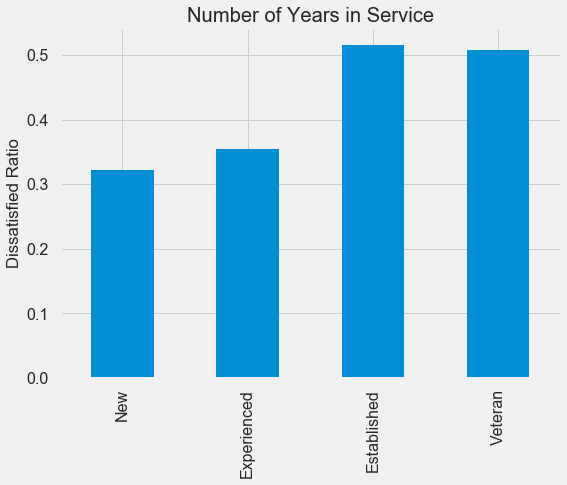

In [157]:
plt.style.use('fivethirtyeight')
ax = pivot_df.loc[['New', 'Experienced', 'Established', 'Veteran']].plot(kind='bar', legend=False, figsize=(8,6))
ax.set_xlabel('')
ax.set_ylabel('Dissatisfied Ratio')
ax.set_title('Number of Years in Service')
plt.savefig('Number of Years in Service.png', bbox_inches='tight')

We can tentatively conclude that employees with over 7 years of work experience are more likely to quit due to dissatisfaction compared to employees that have worked for less than 7 years at the organization.

### Based on age

First, lets clean up the age column and divide the age into categorical groups of <20, 21-40, 41-60 and >60. We will also replace the missing values with the most occuring value in that column. Finally, we will use the pivot table to calculate the percentage of employees that resigned based on age.

In [62]:
combined_updated['age_cleaned'] = combined_updated['age'].astype(str).str.extract(r'(\d+)').astype(float)
combined_updated['age_cleaned'].value_counts()

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age_cleaned, dtype: int64

In [70]:
def update_age(val):
    if pd.isnull(val):
        return np.nan
    elif val <=20:
        return '<20'
    elif 21 <= val <= 30:
        return '21-30'
    elif 31 <= val <= 40:
        return '31-40'
    elif 41 <= val <= 50:
        return '41-50'
    elif 51 <= val <=60:
        return '51-60'
    elif val >=61:
        return '>60'
    
combined_updated['age_cat'] = combined_updated['age_cleaned'].apply(update_age)
combined_updated['age_cat'].value_counts(dropna=False)

41-50    174
31-40    134
21-30    129
51-60    126
NaN       55
>60       23
<20       10
Name: age_cat, dtype: int64

Text(0.5, 0, 'Age Group')

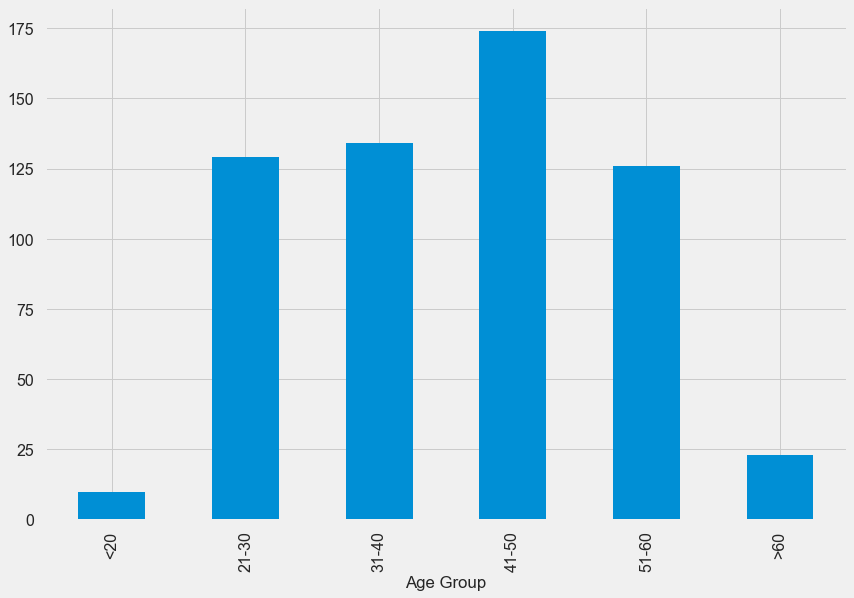

In [160]:
combined_updated['age_cat'].value_counts()[['<20', '21-30', '31-40', '41-50', '51-60', '>60']].plot(kind='bar')
plt.xlabel('Age Group')

The majority of the employees fall under the 41-50 category. Lets replace the missing values with that category.

In [67]:
combined_updated['age_cat'].fillna('41-50', inplace=True)
#quick check to see if the values have been filled
combined_updated['age_cat'].value_counts(dropna=False)

41-50    229
31-40    134
21-30    129
51-60    126
>60       23
<20       10
Name: age_cat, dtype: int64

In [72]:
pivot_age = combined_updated.pivot_table(index='age_cat', values='dissatisfied')
pivot_age

,dissatisfied
age_cat,
21-30,0.372093
31-40,0.380597
41-50,0.390805
51-60,0.428571
<20,0.300000
>60,0.521739


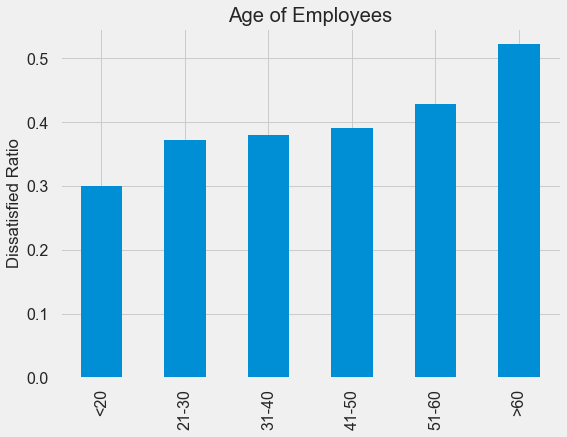

In [161]:
ax = pivot_age.loc[['<20', '21-30', '31-40', '41-50', '51-60', '>60']].plot(kind='bar', legend=False, figsize=(8,6))
ax.set_xlabel('Age of Employee')
ax.set_xlabel('')
ax.set_ylabel('Dissatisfied Ratio')
ax.set_title('Age of Employees')
plt.savefig('Based on age.png', bbox_inches='tight')

We can conclude from the plot above that employee dissatisfaction increases with age, with over 50% of ex-employees over the age of 60 resiging because of it.

### Based on Gender

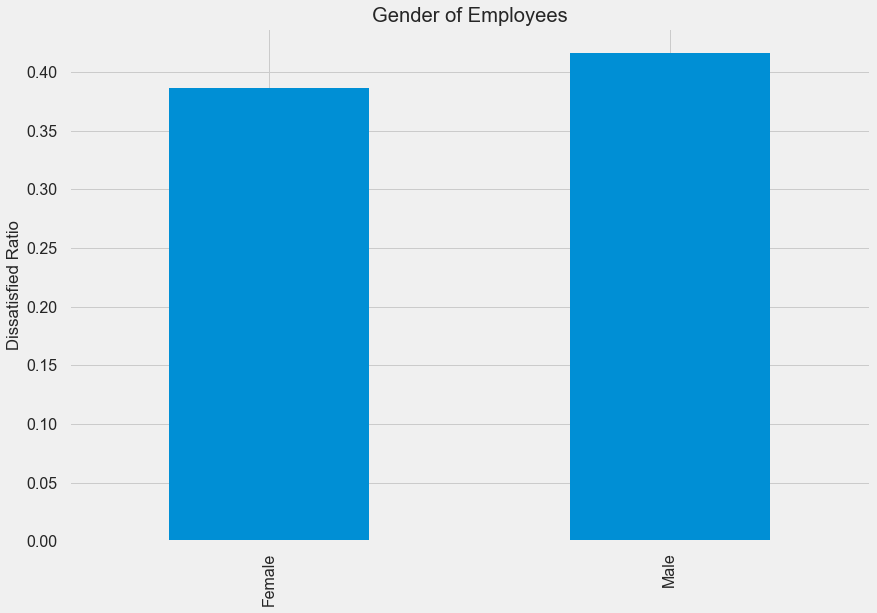

In [167]:
combined_updated['gender'].value_counts(dropna=False)
ax = combined_updated.pivot_table(index='gender', values='dissatisfied').plot(kind='bar', legend=False)
ax.set_xlabel('')
ax.set_ylabel('Dissatisfied Ratio')
ax.set_title('Gender of Employees')
plt.savefig('Based on gender.png', bbox_inches='tight')

### Based on organization

Lets check if there is a difference in the percentage of dissatisfied ex-employees based on the organization.

In [74]:
pivot_org = combined_updated.pivot_table(index='institute', values=['dissatisfied', 'age_cleaned', 'service_cat', 'cleaned_institute_service', 'age_cat'], 
                                         aggfunc={'service_cat': lambda x: x.mode()[0],
                                                  'age_cat': lambda x: x.mode()[0],
                                                  'dissatisfied': np.mean,
                                                  'age_cleaned': np.mean,
                                                  'cleaned_institute_service': np.mean
                                                 }
                                        )
pivot_org

,age_cat,age_cleaned,cleaned_institute_service,dissatisfied,service_cat
institute,,,,,
DETE,41-50,40.212418,10.457875,0.495177,Veteran
TAFE,41-50,38.279310,3.875862,0.285294,New


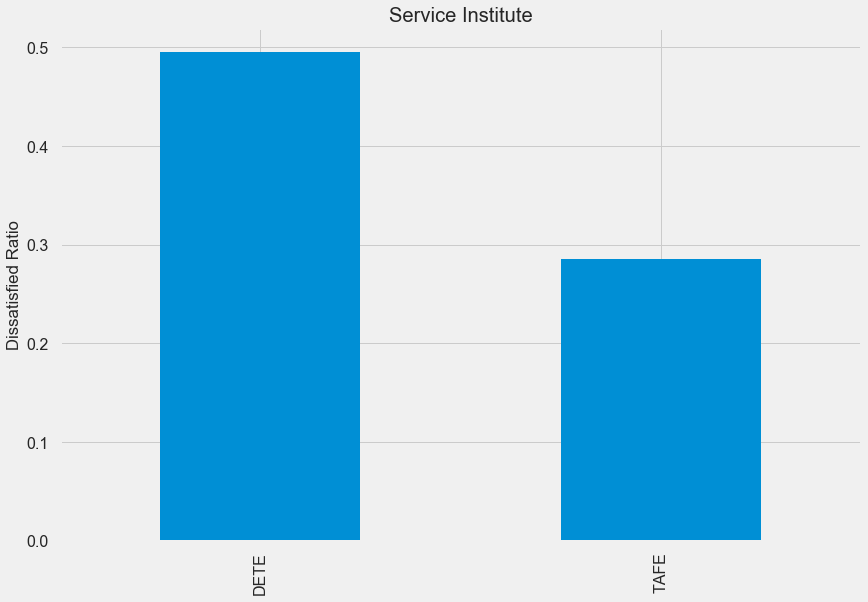

In [169]:
ax = pivot_org['dissatisfied'].plot(kind='bar')
ax.set_xlabel('')
ax.set_ylabel('Dissatisfied Ratio')
ax.set_title('Service Institute')
plt.savefig('DETE-vs-TAFE.png', bbox_inches='tight')

Almost 50% of the employees that worked at DETE resigned due to dissatisfaction compared to less than 30% of TAFE employees.

### Based on 'Teaching' vs 'Non-Teaching' jobs

Lets check if employees in one type of position are more inclined to quit due to dissatisfaction compared to another. To do that, we will divide the jobs into teaching and non-teaching categories. We will clean up the position column first and then apply function to categorize it.

In [82]:
combined_updated['cleaned_position'] = combined_updated.position.str.extract(r'(\w+[\s*\w+]+)', expand=False)
combined_updated['cleaned_position']

0                               Teacher
1                      Guidance Officer
2                               Teacher
3                          Teacher Aide
4                               Teacher
5                               Teacher
6                               Teacher
7                          Teacher Aide
8                               Teacher
9                               Cleaner
10          School Administrative Staff
11                              Teacher
12                              Teacher
13                       Public Servant
14                              Teacher
15                              Cleaner
16                         Teacher Aide
17                              Teacher
18                              Teacher
19                   Head of Curriculum
20                              Cleaner
21                              Teacher
22                              Cleaner
23                              Cleaner
24                              Cleaner


In [83]:
def update_pos(val):
    if pd.isnull(val):
        return np.nan
    elif val in ['Teacher', 'Teacher Aide', 'Guidance Officer', 'Tutor']:
        return 'Teaching'
    else:
        return 'Non-Teaching'
    
combined_updated['position_cat'] = combined_updated['position'].apply(update_pos)
combined_updated['position_cat'].value_counts(dropna=False)

Non-Teaching    400
Teaching        198
NaN              53
Name: position_cat, dtype: int64

In [84]:
#combined_updated['position_cat'].fillna('Non-Teaching', inplace=True)
pivot_position = combined_updated.pivot_table(index='position_cat', values='dissatisfied')
pivot_position

,dissatisfied
position_cat,
Non-Teaching,0.342500
Teaching,0.494949


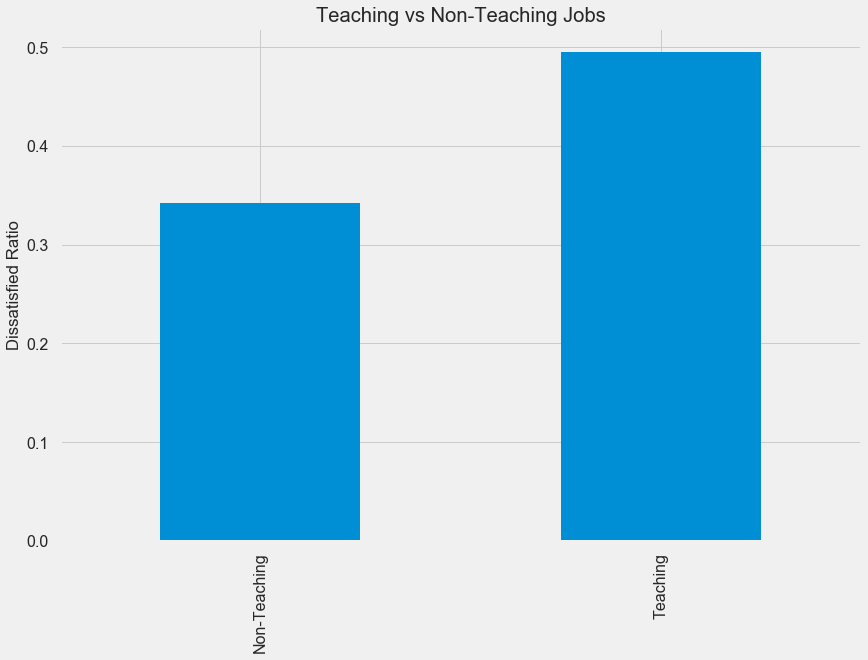

In [170]:
ax = pivot_position.plot(kind='bar', legend=False)
ax.set_xlabel('')
ax.set_ylabel('Dissatisfied Ratio')
ax.set_title('Teaching vs Non-Teaching Jobs')
plt.savefig('Based on job type.png', bbox_inches='tight')

Almost 50% of 'Teaching' employees that resigned noted job dissatisfaction as the primary reason compared to only 34% of non-teaching employees.

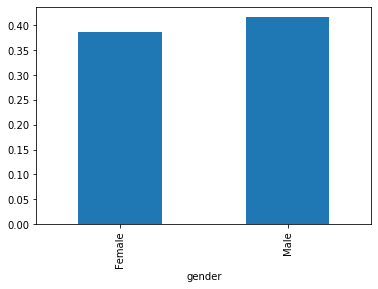

In [120]:
combined_updated.pivot_table(index='gender', values='dissatisfied').plot(kind='bar', legend=False)

There is no substantial difference in the percentage of males vs females resigning due to dissatisfaction.

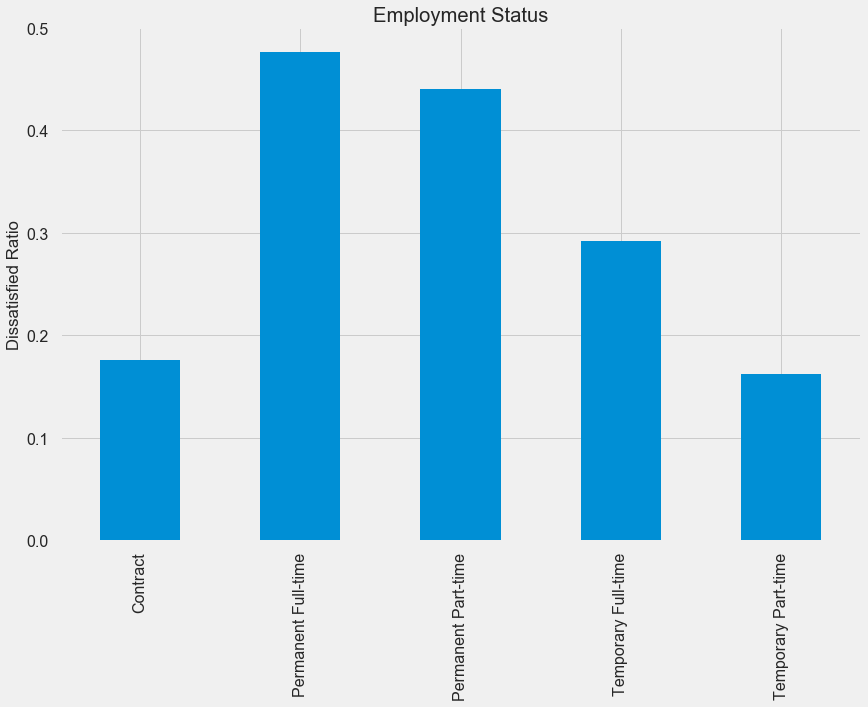

In [172]:
combined_updated['cleaned_employment_status'] = combined_updated['employment_status'].apply(lambda val: 'Contract' if val in ['Contract/casual', 'Casual'] else val)
ax = combined_updated.pivot_table(index='cleaned_employment_status', values='dissatisfied').plot(kind='bar', legend=False)
ax.set_xlabel('')
ax.set_ylabel('Dissatisfied Ratio')
ax.set_title('Employment Status')
plt.savefig('Based on employment status.png', bbox_inches='tight')

More than 40% of permanent employees (both full-time and part-time) resigned due to dissatisfaction compared to less than 30% of temporary employees.

## Conclusion

Organized and cleaned employee exit survey data from the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. <br>The following observations were made - <br>
<ol>
<li>Over 50% of employees with more than 7 years of experience noted job dissatisfaction as a reason for their resignation.</li> 
<li>The dissatisfaction increased with age as ~52% of the employees over the age of 60 resigned over dissatisfaction compared to only 30% of the employees less than 20 years old.</li> 
<li>Both males and females were equally likely to resign due to dissatisfaction.</li>
<li>The dissatisfaction is more prevalent in the Department of Education, Training and Employment (DETE) with 50% of people resigning over it compared to only 28% of TAFE employees. </li>
<li>Majority of employees that quit due to dissatisfaction worked in teaching jobs and had been hired as permanent employees.</li>
</ol>
Based on the above findings, it is recommended that further survey be done on 'experienced' and 'veteran' employees in permanent teaching jobs to review what may be causing employee dissatisfaction.
